In [1]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise import Reader, Dataset, SVD
from surprise import KNNBasic

In [2]:
ratings = pd.read_csv("ratings_small.csv")
ratings.head(100)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
95,2,720,4.0,835355978
96,3,60,3.0,1298861675
97,3,110,4.0,1298922049
98,3,247,3.5,1298861637


In [3]:
reader = Reader()

In [4]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

### Compute the average MAE and RMSE of the Probabilistic Matrix Factorization(PMF)

In [5]:
pmf = SVD(biased=False)
# Run 5-fold cross-validation and then print results
pmf_output = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
pmf_rmse_mean = pmf_output['test_rmse'].mean()
pmf_mae_mean = pmf_output['test_mae'].mean()
print("Average RMSE of the Probabilistic Matrix Factorization(PMF): ", pmf_rmse_mean)
print("\nAverage MAE of the Probabilistic Matrix Factorization(PMF): ", pmf_mae_mean)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0062  0.9988  1.0116  1.0204  1.0218  1.0118  0.0087  
MAE (testset)     0.7766  0.7714  0.7811  0.7880  0.7879  0.7810  0.0065  
Fit time          6.19    6.75    6.69    6.78    6.64    6.61    0.21    
Test time         0.17    0.18    0.19    0.29    0.26    0.22    0.05    
Average RMSE of the Probabilistic Matrix Factorization(PMF):  1.0117562118297307

Average MAE of the Probabilistic Matrix Factorization(PMF):  0.7810210560798196


### Compute the average MAE and RMSE of the User based Collaborative Filtering

In [6]:
userbasedCF = KNNBasic(sim_options={'user_based':True})
# Run 5-fold cross-validation and then print results
userbasedCF_output = cross_validate(userbasedCF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
userbasedCF_rmse_mean = userbasedCF_output['test_rmse'].mean()
userbasedCF_mae_mean = userbasedCF_output['test_mae'].mean()
print("Average RMSE of the User based Collaborative Filtering: ", userbasedCF_rmse_mean)
print("\nAverage MAE of the User based Collaborative Filtering: ", userbasedCF_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9645  0.9704  0.9576  0.9622  0.9744  0.9658  0.0060  
MAE (testset)     0.7387  0.7490  0.7375  0.7398  0.7493  0.7429  0.0052  
Fit time          0.14    0.17    0.19    0.19    0.20    0.18    0.02    
Test time         2.17    2.29    2.49    2.54    2.17    2.33    0.16    
Average RMSE of the User based Collaborative Filtering:  0.965834549694879

Average MAE of the User based Collaborative Filtering:  0.7428860697838047


### Compute the average MAE and RMSE of the Item based Collaborative Filtering

In [7]:
itembasedCF = KNNBasic(sim_options={'user_based':False})
# Run 5-fold cross-validation and then print results
itembasedCF_output = cross_validate(itembasedCF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
itembasedCF_rmse_mean = itembasedCF_output['test_rmse'].mean()
itembasedCF_mae_mean = itembasedCF_output['test_mae'].mean()
print("Average RMSE of the Item based Collaborative Filtering: ", itembasedCF_rmse_mean)
print("\nAverage MAE of the Item based Collaborative Filtering: ", itembasedCF_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9465  0.9373  0.9288  0.9299  0.9287  0.9343  0.0069  
MAE (testset)     0.7309  0.7214  0.7142  0.7176  0.7177  0.7204  0.0058  
Fit time          5.21    5.54    5.55    5.24    5.57    5.42    0.16    
Test time         9.72    10.36   10.37   9.79    10.28   10.10   0.29    
Average RMSE of the Item based Collaborative Filtering:  0.9342585609922684

Average MAE of the Item based Collaborative Filtering:  0.7203624879895185


### Impact the performances of User based Collaborative Filtering with MSD, Cosine and Pearson Similarity

In [8]:
# user based CF with MSD similarity
userbasedCF_MSD = KNNBasic(sim_options={'name':'MSD', 'user_based':True})
# user based CF with cosine similarity
userbasedCF_cosine = KNNBasic(sim_options={'name':'cosine', 'user_based':True}) 
# user based CF with pearson similarity
userbasedCF_pearson = KNNBasic(sim_options={'name':'pearson', 'user_based':True}) 
print("User based collaborative Filtering with MSD similarity function:")
userbasedCF_MSD_Output = cross_validate(userbasedCF_MSD, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("User based collaborative Filtering with cosine similarity function:")
userbasedCF_Cosine_Output = cross_validate(userbasedCF_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("User based collaborative Filtering with pearson similarity function:")
userbasedCF_Pearson_Output = cross_validate(userbasedCF_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

User based collaborative Filtering with MSD similarity function:
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9661  0.9725  0.9636  0.9684  0.9600  0.9661  0.0042  
MAE (testset)     0.7399  0.7478  0.7411  0.7488  0.7371  0.7430  0.0046  
Fit time          0.17    0.20    0.18    0.20    0.16    0.18    0.02    
Test time         2.50    2.33    2.49    2.23    2.15    2.34    0.14    
User based collaborative Filtering with cosine similarity function:
Computing the cosine similarity matrix...
Done computing similarity 

In [9]:
userbasedCF_MSD_rmse_mean = userbasedCF_MSD_Output['test_rmse'].mean()
userbasedCF_MSD_mae_mean = userbasedCF_MSD_Output['test_mae'].mean()
print("Average RMSE of the User based Collaborative Filtering with MSD similarity function: ", userbasedCF_MSD_rmse_mean)
print("\nAverage MAE of the User based Collaborative Filtering with MSD similarity function: ", userbasedCF_MSD_mae_mean)
userbasedCF_Cosine_rmse_mean = userbasedCF_Cosine_Output['test_rmse'].mean()
userbasedCF_Cosine_mae_mean = userbasedCF_Cosine_Output['test_mae'].mean()
print("Average RMSE of the User based Collaborative Filtering with Cosine similarity function: ", userbasedCF_Cosine_rmse_mean)
print("\nAverage MAE of the User based Collaborative Filtering with Cosine similarity function: ", userbasedCF_Cosine_mae_mean)
userbasedCF_Pearson_rmse_mean = userbasedCF_Pearson_Output['test_rmse'].mean()
userbasedCF_Pearson_mae_mean = userbasedCF_Pearson_Output['test_mae'].mean()
print("Average RMSE of the User based Collaborative Filtering with Pearson similarity function: ", userbasedCF_Pearson_rmse_mean)
print("\nAverage MAE of the User based Collaborative Filtering with Pearson similarity function: ", userbasedCF_Pearson_mae_mean)

Average RMSE of the User based Collaborative Filtering with MSD similarity function:  0.966108149190647

Average MAE of the User based Collaborative Filtering with MSD similarity function:  0.7429503201447745
Average RMSE of the User based Collaborative Filtering with Cosine similarity function:  0.9942417750876672

Average MAE of the User based Collaborative Filtering with Cosine similarity function:  0.7679328561501763
Average RMSE of the User based Collaborative Filtering with Pearson similarity function:  0.9978824356753968

Average MAE of the User based Collaborative Filtering with Pearson similarity function:  0.772896050093876


### Impact the performances of Item based Collaborative Filtering with MSD, Cosine and Pearson Similarity

In [10]:
# item based CF with MSD similarity
itembasedCF_MSD = KNNBasic(sim_options={'name':'MSD', 'user_based':False})
# item based CF with cosine similarity
itembasedCF_cosine = KNNBasic(sim_options={'name':'cosine', 'user_based':False}) 
# item based CF with pearson similarity
itembasedCF_pearson = KNNBasic(sim_options={'name':'pearson', 'user_based':False}) 
print("Item based collaborative Filtering with MSD similarity function:")
itembasedCF_MSD_Output = cross_validate(itembasedCF_MSD, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("Item based collaborative Filtering with cosine similarity function:")
itembasedCF_Cosine_Output = cross_validate(itembasedCF_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("Item based collaborative Filtering with pearson similarity function:")
itembasedCF_Pearson_Output = cross_validate(itembasedCF_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Item based collaborative Filtering with MSD similarity function:
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9342  0.9408  0.9279  0.9399  0.9312  0.9348  0.0050  
MAE (testset)     0.7222  0.7250  0.7169  0.7232  0.7184  0.7212  0.0030  
Fit time          5.47    5.66    5.65    5.55    5.46    5.56    0.08    
Test time         9.58    9.70    9.71    9.84    10.44   9.85    0.30    
Item based collaborative Filtering with cosine similarity function:
Computing the cosine similarity matrix...
Done computing similarity 

In [11]:
itembasedCF_MSD_rmse_mean = itembasedCF_MSD_Output['test_rmse'].mean()
itembasedCF_MSD_mae_mean = itembasedCF_MSD_Output['test_mae'].mean()
print("Average RMSE of the Item based Collaborative Filtering with MSD similarity function: ", itembasedCF_MSD_rmse_mean)
print("\nAverage MAE of the Item based Collaborative Filtering with MSD similarity function: ", itembasedCF_MSD_mae_mean)
itembasedCF_Cosine_rmse_mean = itembasedCF_Cosine_Output['test_rmse'].mean()
itembasedCF_Cosine_mae_mean = itembasedCF_Cosine_Output['test_mae'].mean()
print("Average RMSE of the Item based Collaborative Filtering with Cosine similarity function: ", itembasedCF_Cosine_rmse_mean)
print("\nAverage MAE of the Item based Collaborative Filtering with Cosine similarity function: ", itembasedCF_Cosine_mae_mean)
itembasedCF_Pearson_rmse_mean = itembasedCF_Pearson_Output['test_rmse'].mean()
itembasedCF_Pearson_mae_mean = itembasedCF_Pearson_Output['test_mae'].mean()
print("Average RMSE of the Item based Collaborative Filtering with Pearson similarity function: ", itembasedCF_Pearson_rmse_mean)
print("\nAverage MAE of the Item based Collaborative Filtering with Pearson similarity function: ", itembasedCF_Pearson_mae_mean)

Average RMSE of the Item based Collaborative Filtering with MSD similarity function:  0.9347818200806473

Average MAE of the Item based Collaborative Filtering with MSD similarity function:  0.7211500797084979
Average RMSE of the Item based Collaborative Filtering with Cosine similarity function:  0.9950272475049614

Average MAE of the Item based Collaborative Filtering with Cosine similarity function:  0.7746184664644684
Average RMSE of the Item based Collaborative Filtering with Pearson similarity function:  0.9893487636587978

Average MAE of the Item based Collaborative Filtering with Pearson similarity function:  0.7682652692997405


#### Comparing the impact of three metrics on User Based CF with the impact of three metrics on Item Based CF

In [12]:
userbased_rmse_list = []
userbased_mae_list = []
itembased_rmse_list = []
itembased_mae_list = []

userbased_rmse_list.append(userbasedCF_MSD_rmse_mean);
userbased_rmse_list.append(userbasedCF_Cosine_rmse_mean);
userbased_rmse_list.append(userbasedCF_Pearson_rmse_mean);

userbased_mae_list.append(userbasedCF_MSD_mae_mean);
userbased_mae_list.append(userbasedCF_Cosine_mae_mean);
userbased_mae_list.append(userbasedCF_Pearson_mae_mean);

itembased_rmse_list.append(itembasedCF_MSD_rmse_mean);
itembased_rmse_list.append(itembasedCF_Cosine_rmse_mean);
itembased_rmse_list.append(itembasedCF_Pearson_rmse_mean);

itembased_mae_list.append(itembasedCF_MSD_mae_mean);
itembased_mae_list.append(itembasedCF_Cosine_mae_mean);
itembased_mae_list.append(itembasedCF_Pearson_mae_mean);

list = []
list.append('MSD');
list.append('Cosine');
list.append('Pearson');


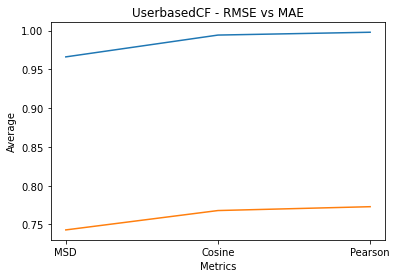

In [13]:
plt.title('UserbasedCF - RMSE vs MAE')

plt.plot(list, userbased_rmse_list, label = 'User Based')
plt.plot(list, userbased_mae_list, label = 'User Based')

plt.xlabel('Metrics')
plt.ylabel('Average')
plt.show()

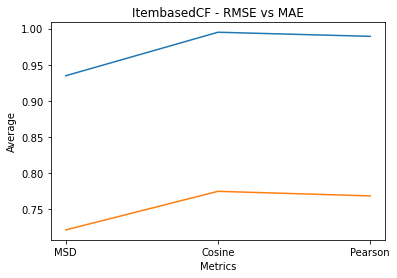

In [14]:
plt.title('ItembasedCF - RMSE vs MAE')

plt.plot(list, itembased_rmse_list, label = 'Item Based')
plt.plot(list, itembased_mae_list, label = 'Item Based')
plt.xlabel('Metrics')
plt.ylabel('Average')
plt.show()

In [15]:
k_list = [i for i in range(1,101)]
userbased_rmsemean_list = []
userbased_maemean_list = []
itembased_rmsemean_list = []
itembased_maemean_list = []
for k in range(1,101):
    
    userbased_CF = KNNBasic(k=k, sim_options={'user_based': True})
    print("User based Collarborative filtering with k=",k, ":")
    userbased_output = cross_validate(userbased_CF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    userbased_rmsemean_list.append(userbased_output['test_rmse'].mean())
    userbased_maemean_list.append(userbased_output['test_mae'].mean())
    itembased_CF = KNNBasic(k=k, sim_options={'user_based': False})
    print("Item based Collarborative filtering with k=", k, ":")
    itembased_output = cross_validate(itembased_CF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    itembased_rmsemean_list.append(itembased_output['test_rmse'].mean())
    itembased_maemean_list.append(itembased_output['test_mae'].mean())

User based Collarborative filtering with k= 1 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1970  1.2192  1.2165  1.2048  1.2165  1.2108  0.0085  
MAE (testset)     0.8908  0.9079  0.9094  0.8980  0.9073  0.9027  0.0072  
Fit time          0.16    0.20    0.19    0.16    0.19    0.18    0.02    
Test time         1.21    1.44    1.15    1.46    1.22    1.30    0.13    
Item based Collarborative filtering with k= 1 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity mat

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9905  0.9662  0.9721  0.9868  0.9782  0.9787  0.0090  
MAE (testset)     0.7567  0.7401  0.7433  0.7525  0.7517  0.7489  0.0062  
Fit time          0.14    0.15    0.19    0.19    0.17    0.17    0.02    
Test time         1.41    1.78    1.56    1.92    1.50    1.63    0.19    
Item based Collarborative filtering with k= 6 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done co

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9612  0.9624  0.9676  0.9555  0.9625  0.9619  0.0038  
MAE (testset)     0.7354  0.7351  0.7406  0.7305  0.7383  0.7360  0.0034  
Fit time          0.16    0.19    0.18    0.20    0.18    0.18    0.01    
Test time         1.69    1.63    1.68    1.76    1.53    1.66    0.08    
Item based Collarborative filtering with k= 11 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9587  0.9596  0.9635  0.9650  0.9580  0.9610  0.0028  
MAE (testset)     0.7342  0.7344  0.7377  0.7405  0.7348  0.7363  0.0024  
Fit time          0.16    0.20    0.18    0.19    0.19    0.19    0.01    
Test time         1.97    1.78    2.12    1.89    2.13    1.98    0.13    
Item based Collarborative filtering with k= 16 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9620  0.9713  0.9585  0.9560  0.9679  0.9632  0.0057  
MAE (testset)     0.7362  0.7458  0.7352  0.7363  0.7386  0.7384  0.0039  
Fit time          0.16    0.17    0.18    0.17    0.18    0.17    0.01    
Test time         1.93    2.05    1.86    2.26    2.01    2.02    0.14    
Item based Collarborative filtering with k= 21 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9580  0.9722  0.9617  0.9568  0.9691  0.9636  0.0061  
MAE (testset)     0.7356  0.7472  0.7364  0.7340  0.7440  0.7395  0.0052  
Fit time          0.13    0.19    0.18    0.19    0.17    0.17    0.02    
Test time         2.10    2.17    2.18    1.87    2.07    2.08    0.11    
Item based Collarborative filtering with k= 26 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9674  0.9649  0.9625  0.9681  0.9613  0.9648  0.0026  
MAE (testset)     0.7407  0.7410  0.7393  0.7429  0.7398  0.7407  0.0013  
Fit time          0.17    0.16    0.17    0.20    0.18    0.18    0.01    
Test time         2.35    2.24    2.19    2.24    2.13    2.23    0.07    
Item based Collarborative filtering with k= 31 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9623  0.9699  0.9702  0.9626  0.9696  0.9669  0.0036  
MAE (testset)     0.7393  0.7445  0.7477  0.7418  0.7425  0.7432  0.0028  
Fit time          0.14    0.20    0.19    0.15    0.16    0.17    0.02    
Test time         2.32    2.65    2.24    2.56    2.21    2.40    0.18    
Item based Collarborative filtering with k= 36 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9633  0.9728  0.9767  0.9638  0.9599  0.9673  0.0064  
MAE (testset)     0.7425  0.7491  0.7497  0.7406  0.7370  0.7438  0.0049  
Fit time          0.13    0.18    0.17    0.17    0.19    0.17    0.02    
Test time         2.42    2.16    2.16    2.25    2.35    2.27    0.10    
Item based Collarborative filtering with k= 41 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9634  0.9766  0.9760  0.9579  0.9678  0.9684  0.0072  
MAE (testset)     0.7435  0.7525  0.7486  0.7361  0.7438  0.7449  0.0055  
Fit time          0.17    0.20    0.19    0.16    0.20    0.18    0.02    
Test time         2.51    2.29    2.43    2.43    2.26    2.38    0.09    
Item based Collarborative filtering with k= 46 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9736  0.9719  0.9644  0.9708  0.9715  0.9704  0.0031  
MAE (testset)     0.7505  0.7486  0.7394  0.7486  0.7455  0.7465  0.0039  
Fit time          0.16    0.20    0.19    0.18    0.20    0.19    0.01    
Test time         2.22    2.70    2.33    2.74    2.52    2.50    0.20    
Item based Collarborative filtering with k= 51 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9736  0.9770  0.9640  0.9739  0.9676  0.9712  0.0047  
MAE (testset)     0.7502  0.7526  0.7425  0.7471  0.7469  0.7479  0.0034  
Fit time          0.17    0.20    0.19    0.17    0.19    0.18    0.01    
Test time         2.32    2.52    2.50    2.53    2.45    2.46    0.08    
Item based Collarborative filtering with k= 56 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9637  0.9756  0.9739  0.9748  0.9716  0.9719  0.0043  
MAE (testset)     0.7417  0.7494  0.7521  0.7494  0.7491  0.7483  0.0035  
Fit time          0.14    0.20    0.19    0.19    0.15    0.17    0.03    
Test time         2.52    2.42    2.48    2.59    2.44    2.49    0.06    
Item based Collarborative filtering with k= 61 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9768  0.9760  0.9768  0.9672  0.9718  0.9737  0.0037  
MAE (testset)     0.7527  0.7520  0.7510  0.7472  0.7462  0.7498  0.0026  
Fit time          0.16    0.19    0.17    0.16    0.20    0.18    0.01    
Test time         2.33    2.52    2.53    2.49    2.53    2.48    0.08    
Item based Collarborative filtering with k= 66 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9680  0.9673  0.9697  0.9784  0.9795  0.9726  0.0053  
MAE (testset)     0.7476  0.7432  0.7479  0.7515  0.7558  0.7492  0.0042  
Fit time          0.17    0.19    0.20    0.16    0.20    0.18    0.02    
Test time         2.46    2.89    2.59    2.53    2.70    2.63    0.15    
Item based Collarborative filtering with k= 71 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9634  0.9706  0.9817  0.9761  0.9762  0.9736  0.0062  
MAE (testset)     0.7432  0.7510  0.7538  0.7513  0.7514  0.7501  0.0036  
Fit time          0.17    0.16    0.17    0.16    0.19    0.17    0.01    
Test time         2.61    2.50    2.71    2.59    2.55    2.59    0.07    
Item based Collarborative filtering with k= 76 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9807  0.9735  0.9726  0.9737  0.9708  0.9742  0.0034  
MAE (testset)     0.7554  0.7510  0.7494  0.7498  0.7484  0.7508  0.0024  
Fit time          0.15    0.16    0.16    0.16    0.19    0.16    0.02    
Test time         2.62    2.23    2.80    2.74    2.94    2.66    0.24    
Item based Collarborative filtering with k= 81 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9711  0.9768  0.9692  0.9784  0.9819  0.9755  0.0047  
MAE (testset)     0.7530  0.7522  0.7434  0.7547  0.7587  0.7524  0.0050  
Fit time          0.09    0.11    0.11    0.11    0.11    0.11    0.01    
Test time         1.54    1.57    1.58    1.59    1.61    1.58    0.02    
Item based Collarborative filtering with k= 86 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9910  0.9697  0.9752  0.9716  0.9702  0.9756  0.0080  
MAE (testset)     0.7645  0.7499  0.7520  0.7484  0.7458  0.7521  0.0065  
Fit time          0.10    0.11    0.11    0.11    0.11    0.11    0.01    
Test time         1.75    1.57    1.74    1.57    1.77    1.68    0.09    
Item based Collarborative filtering with k= 91 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9735  0.9750  0.9646  0.9678  0.9864  0.9734  0.0075  
MAE (testset)     0.7501  0.7528  0.7440  0.7463  0.7614  0.7509  0.0061  
Fit time          0.09    0.11    0.11    0.11    0.11    0.11    0.01    
Test time         1.54    1.58    1.57    1.59    1.57    1.57    0.02    
Item based Collarborative filtering with k= 96 :
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

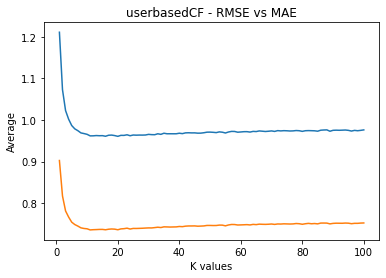

In [19]:
plt.title('userbasedCF - RMSE vs MAE')

plt.plot(k_list, userbased_rmsemean_list, label = 'User Based')
plt.plot(k_list, userbased_maemean_list, label = 'User Based')
plt.xlabel('K values')
plt.ylabel('Average')
plt.show()

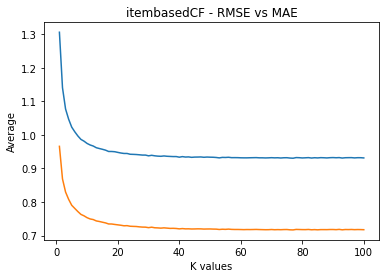

In [21]:
plt.title('itembasedCF - RMSE vs MAE')

plt.plot(k_list, itembased_rmsemean_list, label = 'Item Based')
plt.plot(k_list, itembased_maemean_list, label = 'Item Based')
plt.xlabel('K values')
plt.ylabel('Average')
plt.show()